In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import pandas

from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, FunctionTransformer, StandardScaler

from datetime import datetime
from scipy.io import readsav
import pyreadstat

# Downloading CSV files

In [2]:
#Path to raw data for 1) Open weather historical data 2) Open-meteo API weather
filepath_hist_api = '/Users/torstenwrigley/code/MadMax1995bb/powder_alert2.0/raw_data/openmeteo_api_zentralstation.csv'

In [3]:
#CSV -> DF for api data
csv_file = filepath_hist_api
df = pd.read_csv(csv_file)
df.tail(3)

,Unnamed: 0,date,temperature_2m,relative_humidity_2m,dew_point_2m,precipitation,rain,snowfall,snow_depth,weather_code,...,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,sunshine_duration
131493,131493,2024-01-01 21:00:00+00:00,-14.571,84.035320,-16.671001,0.0,0.0,0.0,1.23,3.0,...,25.56,0.679,0.929,1.779,3.629,0.24,0.246,0.238,0.267,0.0
131494,131494,2024-01-01 22:00:00+00:00,-13.721,80.381676,-16.371000,0.0,0.0,0.0,1.23,3.0,...,26.28,0.679,0.929,1.779,3.629,0.24,0.246,0.238,0.267,0.0
131495,131495,2024-01-01 23:00:00+00:00,-13.421,78.443700,-16.371000,0.0,0.0,0.0,1.23,1.0,...,27.00,0.679,0.929,1.779,3.629,0.24,0.246,0.238,0.267,0.0


# Data cleaning 

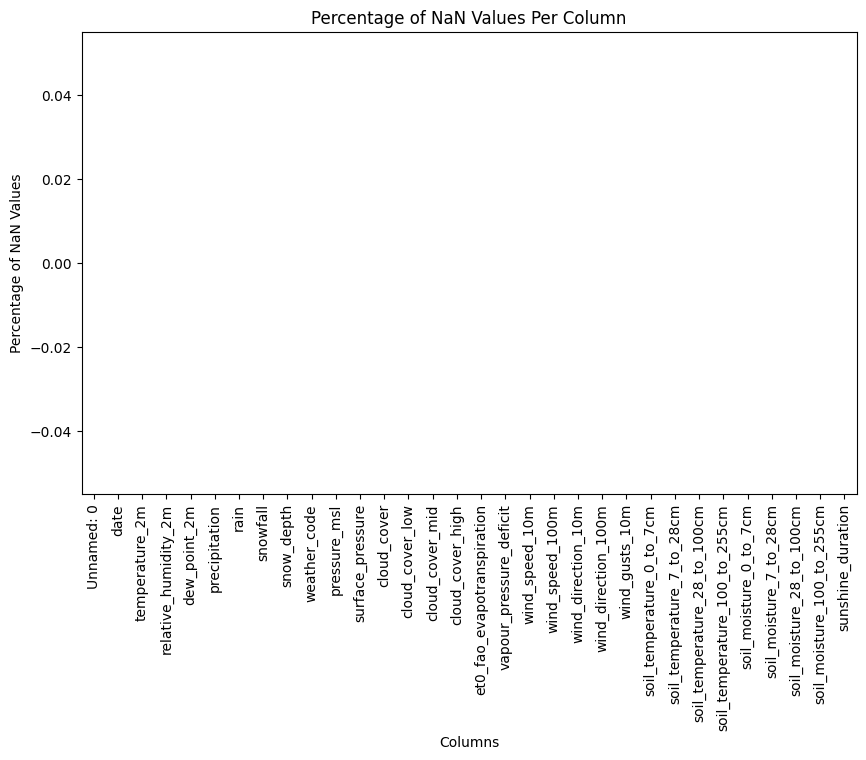

In [4]:
#Visualising number of null values in each column
nan_distribution = (df.isna().sum() / len(df)) * 100
nan_distribution.plot(kind='bar', figsize=(10, 6), title='Percentage of NaN Values Per Column')
plt.ylabel('Percentage of NaN Values')
plt.xlabel('Columns')
plt.show();

In [5]:
#Checking and dropping any duplicates duplicates
print(f'Number of rows = {len(df)}') # Check number of rows before removing duplicates

Number of rows = 131496


In [6]:
print(f'Number of duplicates = {df.duplicated().sum()}') # Compute the number of duplicated rows
df = df.drop_duplicates() # Remove duplicates
print(f'Number of rows (after dropping duplicates) = {len(df)}')

Number of duplicates = 0
Number of rows (after dropping duplicates) = 131496


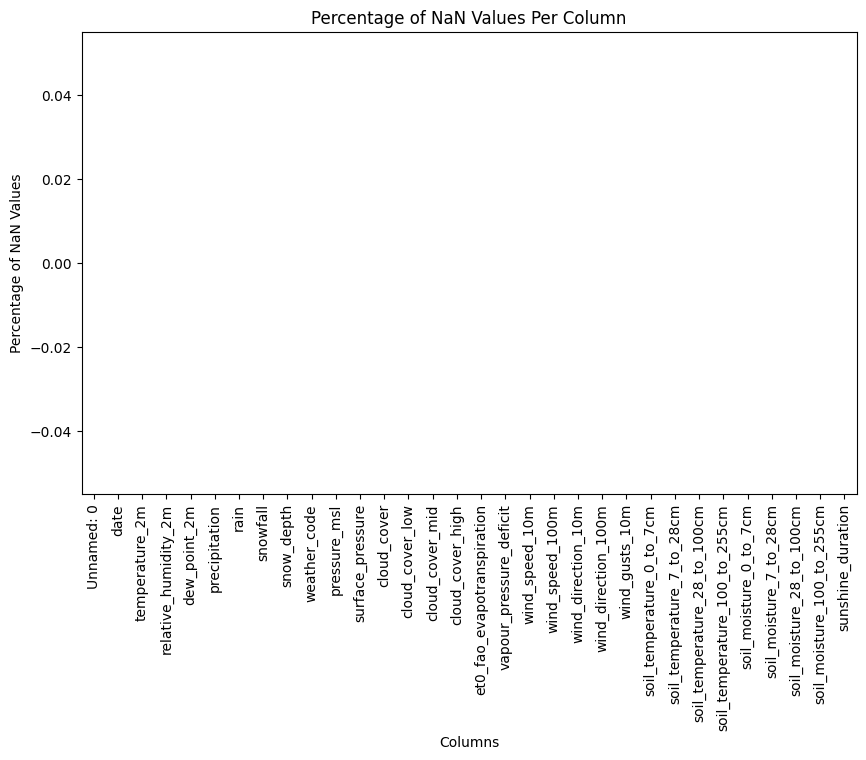

In [7]:
#Visualising number of null values in each column AFTER data cleaning

nan_distribution = (df.isna().sum() / len(df)) * 100
nan_distribution.plot(kind='bar', figsize=(10, 6), title='Percentage of NaN Values Per Column')
plt.ylabel('Percentage of NaN Values')
plt.xlabel('Columns')
plt.show();

# Data preprocessing 

In [8]:
df.shape

(131496, 32)

In [9]:
df.head(2)

,Unnamed: 0,date,temperature_2m,relative_humidity_2m,dew_point_2m,precipitation,rain,snowfall,snow_depth,weather_code,...,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,sunshine_duration
0,0,2009-01-01 00:00:00+00:00,-10.842501,72.96817,-14.7425,0.0,0.0,0.0,0.92,3.0,...,29.88,-0.1425,0.2575,1.1575,2.6575,0.21,0.214,0.209,0.269,0.0
1,1,2009-01-01 01:00:00+00:00,-10.642500,73.91152,-14.3925,0.0,0.0,0.0,0.92,3.0,...,25.56,-0.1425,0.2575,1.1075,2.6575,0.21,0.214,0.209,0.269,0.0


In [10]:
df.set_index(['date'], inplace=True)

In [11]:
df.head(2)

,Unnamed: 0,temperature_2m,relative_humidity_2m,dew_point_2m,precipitation,rain,snowfall,snow_depth,weather_code,pressure_msl,...,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,sunshine_duration
date,,,,,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00+00:00,0,-10.842501,72.96817,-14.7425,0.0,0.0,0.0,0.92,3.0,1025.2,...,29.88,-0.1425,0.2575,1.1575,2.6575,0.21,0.214,0.209,0.269,0.0
2009-01-01 01:00:00+00:00,1,-10.642500,73.91152,-14.3925,0.0,0.0,0.0,0.92,3.0,1025.2,...,25.56,-0.1425,0.2575,1.1075,2.6575,0.21,0.214,0.209,0.269,0.0


In [12]:
target = ['snowfall']

#Defining our X value
X = df.drop(columns=target, axis=1)

In [13]:
X.head(2)

,Unnamed: 0,temperature_2m,relative_humidity_2m,dew_point_2m,precipitation,rain,snow_depth,weather_code,pressure_msl,surface_pressure,...,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,sunshine_duration
date,,,,,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00+00:00,0,-10.842501,72.96817,-14.7425,0.0,0.0,0.92,3.0,1025.2,813.2572,...,29.88,-0.1425,0.2575,1.1575,2.6575,0.21,0.214,0.209,0.269,0.0
2009-01-01 01:00:00+00:00,1,-10.642500,73.91152,-14.3925,0.0,0.0,0.92,3.0,1025.2,813.3975,...,25.56,-0.1425,0.2575,1.1075,2.6575,0.21,0.214,0.209,0.269,0.0


In [14]:
y = df[target]

## Creating our pipeline

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131496 entries, 2009-01-01 00:00:00+00:00 to 2024-01-01 23:00:00+00:00
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     131496 non-null  int64  
 1   temperature_2m                 131496 non-null  float64
 2   relative_humidity_2m           131496 non-null  float64
 3   dew_point_2m                   131496 non-null  float64
 4   precipitation                  131496 non-null  float64
 5   rain                           131496 non-null  float64
 6   snowfall                       131496 non-null  float64
 7   snow_depth                     131496 non-null  float64
 8   weather_code                   131496 non-null  float64
 9   pressure_msl                   131496 non-null  float64
 10  surface_pressure               131496 non-null  float64
 11  cloud_cover                    131496 non-null  float

In [16]:
# Assigning categorical and numerical variables
cat_columns = ['weather_code']
num_columns = X.drop(columns=cat_columns).select_dtypes(include=['float64']).columns.tolist()

# Function to apply LabelEncoder
def label_encode_columns(cat_data):
    for col in cat_columns:
        cat_data[col] = LabelEncoder().fit_transform(cat_data[col])
    return cat_data

# Helper function to generate column names for label-encoded columns
def get_label_encoded_column_names(cat_columns):
    return [f"{col}_encoded" for col in cat_columns]

# Define the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        # Apply FunctionTransformer to label encode categorical columns
        ('label_encoder', FunctionTransformer(label_encode_columns, validate=False), cat_columns),

        # Apply StandardScaler to numerical columns
        ('standard_scaler', StandardScaler(), num_columns)
    ],
    remainder='passthrough'  # Keeps other columns as is
)

# Create the pipeline
preprocess_pipe = make_pipeline(preprocessor)
preprocess_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('label_encoder',
                                                  FunctionTransformer(func=<function label_encode_columns at 0x1066a08b0>),
                                                  ['weather_code']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['temperature_2m',
                                                   'relative_humidity_2m',
                                                   'dew_point_2m',
                                                   'precipitation', 'rain',
                                                   'snow_depth', 'pressure_msl',
                                                   'surface_...
                                                   'vapour_pressure_deficit',
                                                   'wind_speed_10m',
                                                   'wind_speed_100m',
                                                   'wind_direction_10m',
                                                   'wind_direction_100m',
                                                   'wind_gusts_10m',
                                                   'soil_temperature_0_to_7cm',
                                                   'soil_temperature_7_to_28cm',
                                                   'soil_temperature_28_to_100cm',
                                                   'soil_temperature_100_to_255cm',
                                                   'soil_moisture_0_to_7cm',
                                                   'soil_moisture_7_to_28cm',
                                                   'soil_moisture_28_to_100cm',
                                                   'soil_moisture_100_to_255cm',
                                                   'sunshine_duration'])]))])

In [17]:
# Fit and transform the data
X_transformed = preprocess_pipe.fit_transform(X)

# Get column names dynamically
label_encoded_columns = get_label_encoded_column_names(cat_columns)
scaled_columns = num_columns
remainder_columns = [col for col in X.columns if col not in cat_columns + num_columns]
all_column_names = label_encoded_columns + scaled_columns + remainder_columns

# Convert transformed data into a DataFrame with proper column names
X_transformed = pd.DataFrame(X_transformed, columns=all_column_names)
X_transformed.head()

,weather_code_encoded,temperature_2m,relative_humidity_2m,dew_point_2m,precipitation,rain,snow_depth,pressure_msl,surface_pressure,cloud_cover,...,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,sunshine_duration,Unnamed: 0
0,3.0,-1.565276,-0.359492,-1.676971,-0.389763,-0.272938,0.821605,0.915229,-0.344468,0.796798,...,-0.722739,-0.722983,-0.650445,-0.336041,-0.997262,-0.925656,-0.660853,-0.544464,-0.740374,0.0
1,3.0,-1.541233,-0.304528,-1.632742,-0.389763,-0.272938,0.821605,0.915229,-0.327194,0.769715,...,-0.722739,-0.722983,-0.663739,-0.336041,-0.997262,-0.925656,-0.660853,-0.544464,-0.740374,1.0
2,10.0,-1.523201,-0.267453,-1.601150,-0.191058,-0.272938,0.821605,0.890052,-0.333781,0.661382,...,-0.732331,-0.722983,-0.663739,-0.336041,-0.997262,-0.925656,-0.660853,-0.544464,-0.740374,2.0
3,10.0,-1.517190,-0.213359,-1.575876,-0.191058,-0.272938,0.821605,0.927818,-0.300137,0.742632,...,-0.732331,-0.722983,-0.663739,-0.336041,-0.997262,-0.925656,-0.660853,-0.544464,-0.740374,3.0
4,10.0,-1.529212,-0.031555,-1.525329,0.007646,-0.272938,0.840378,0.952995,-0.289222,0.769715,...,-0.732331,-0.722983,-0.663739,-0.336041,-0.997262,-0.925656,-0.660853,-0.544464,-0.740374,4.0


In [18]:
X_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131496 entries, 0 to 131495
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   weather_code_encoded           131496 non-null  float64
 1   temperature_2m                 131496 non-null  float64
 2   relative_humidity_2m           131496 non-null  float64
 3   dew_point_2m                   131496 non-null  float64
 4   precipitation                  131496 non-null  float64
 5   rain                           131496 non-null  float64
 6   snow_depth                     131496 non-null  float64
 7   pressure_msl                   131496 non-null  float64
 8   surface_pressure               131496 non-null  float64
 9   cloud_cover                    131496 non-null  float64
 10  cloud_cover_low                131496 non-null  float64
 11  cloud_cover_mid                131496 non-null  float64
 12  cloud_cover_high              

# Feature selection (univariate)

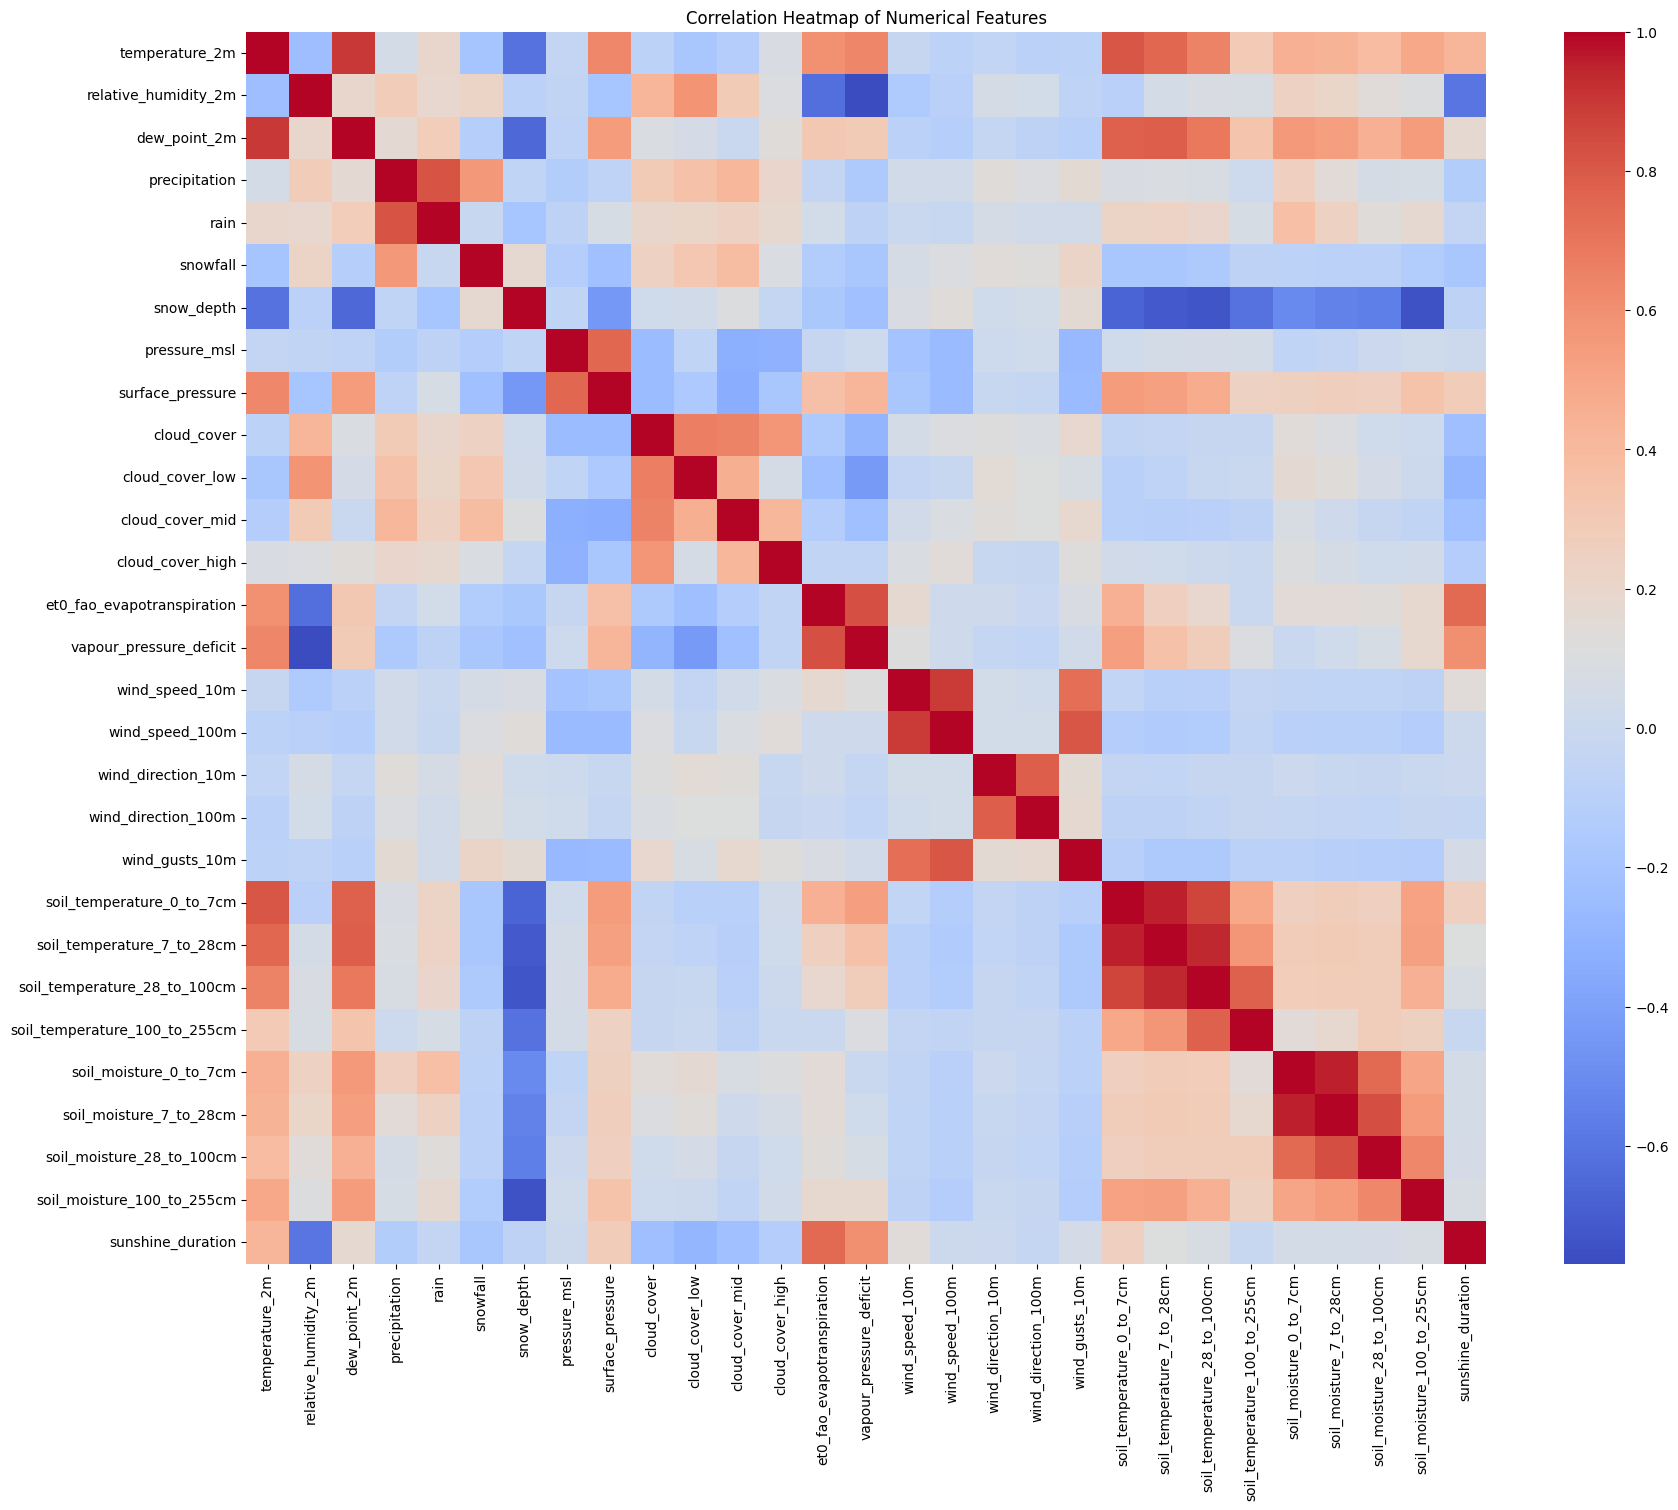

In [19]:
num_columns = [
    'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
    'precipitation', 'rain', 'snowfall', 'snow_depth', 'pressure_msl', 'surface_pressure',
    'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high',
    'et0_fao_evapotranspiration', 'vapour_pressure_deficit', 'wind_speed_10m',
    'wind_speed_100m', 'wind_direction_10m', 'wind_direction_100m', 'wind_gusts_10m',
    'soil_temperature_0_to_7cm', 'soil_temperature_7_to_28cm', 'soil_temperature_28_to_100cm',
    'soil_temperature_100_to_255cm', 'soil_moisture_0_to_7cm', 'soil_moisture_7_to_28cm',
    'soil_moisture_28_to_100cm', 'soil_moisture_100_to_255cm', 'sunshine_duration',
]
# Compute the correlation matrix
correlation_matrix = df[num_columns].corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# Test-train split